### Pair Programming Intro Machine Learning
Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

## Objetivos

Los objetivos de hoy son:

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.



In [48]:
#abrimos el df:
df=pd.read_csv("datos/diamonds.csv", index_col=0)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### Significado de las columnas: 

- *price*: price in US dollars (\$326--\$18,823)

- *carat*: weight of the diamond (0.2--5.01)

- *cut*: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- *color*: diamond colour, from J (worst) to D (best)

- *clarity*: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- *x*: length in mm (0--10.74)

- *y*: width in mm (0--58.9)

- *z*: depth in mm (0--31.8)

- *depth*: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- *table* width of top of diamond relative to widest point (43--95)

### Explicación variables

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [49]:
#exploramos el df:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [50]:
print(f'El numero de filas antes de borrar los casos duplicados es: {df.shape[0]}, y el numero de columnas es: {df.shape[1]}')

El numero de filas antes de borrar los casos duplicados es: 53940, y el numero de columnas es: 10


In [51]:
#calculamos el % de nulos:
df.isnull().sum()*100/df.shape[0]

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

Los nombres de las columnas x, y, z son poco claros, por lo que tras consultar la documentación del DF y comprender su significado, vamos a reemplazar los nombres:

- x: length in mm 
- y: width in mm 
- z: depth in mm  

In [52]:
#renombramos las columnas:
df.rename(columns={'x': 'lenght_mm', 'y': 'width_mm', 'z': 'depth_mm'}, inplace=True)

#comprobamos que se han renombrado:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'lenght_mm', 'width_mm', 'depth_mm'],
      dtype='object')

Tenemos duplicados por lo que procederemos a su limpieza:

In [53]:
#almacenamos los casos duplicados en un df:
df_duplis = df[df.duplicated()]
df_duplis.head()

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28


In [54]:
print(f'Tenemos un total de {df.duplicated().sum()} casos duplicados.')

#procedemos a borrarlos:
df.drop_duplicates(inplace=True)

print(f'El numero de filas después de borrar los casos duplicados es: {df.shape[0]}, y el numero de columnas es: {df.shape[1]}')

Tenemos un total de 146 casos duplicados.
El numero de filas después de borrar los casos duplicados es: 53794, y el numero de columnas es: 10


Tras el analisis exploratorio de los datos, concluimos que no es necesaria una depuracion del dataset

In [55]:
#variables numéricas.
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.80,0.47,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.75,1.43,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.46,2.23,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.07,3988.11,326.0,951.00,2401.00,5326.75,18823.00
lenght_mm,53794.0,5.73,1.12,0.0,4.71,5.70,6.54,10.74
width_mm,53794.0,5.73,1.14,0.0,4.72,5.71,6.54,58.90
depth_mm,53794.0,3.54,0.71,0.0,2.91,3.53,4.03,31.80


#### Interpretación:

Como exploración inicial, hacemos referencia a los datos que consideramos más llamativos:

- *carat*: Vemos que la media de nuestra variable respuesta (0.8) es muy cercana al valor mínimo de los carats (0.2), ubicándose entre el percentil 25 (0.4) y el percentil 50 o mediana (0.70). Por lo tanto, vemos que la mayoría de nuestros diamantes tienen muy pocos carats. Estas puntuaciones, por otro lado, están muy dispersas tal y como podemos observar en la DT (0.47), al suponer la mitad de la media.

- *prices (precios)*: La desviación típica en los precios (3988.11 USD) es todavía más alta que la media (3933.07 USD), lo que nos indica que las precios están muy dispersos: Hay precios muy altos y precios muy bajos. Esto también podemos verlo en los saltos cualitativos que encontramos en los percentiles (P25 = 951 USD; P50 o mediana= 2401; P75 = 5326.75). Además, el precio máximo casi quadriplica la frontera del rango intercuartílico. 

**Conclusión:**

Los datos son muy dispersos. Es probable que encontremos muchos outliers. Lo comprobaremos realizando la representación gráfica (boxplot).

In [56]:
#variables categóricas.
categoricas = df.describe(include='object').T
categoricas['freq_%'] = categoricas['freq']/categoricas['freq'].sum()
categoricas.head()

,count,unique,top,freq,freq_%
cut,53794,5,Ideal,21488,0.469355
color,53794,7,G,11262,0.245992
clarity,53794,8,SI1,13032,0.284653


In [57]:
#extraemos los valores únicos de las variables categóricas para interpretar mejor los resultados:
for x in df.select_dtypes(include='object'):
    print(x.upper(), ':', df[x].unique())

CUT : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
COLOR : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
CLARITY : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


#### Interpretación de las variables categóricas:

Vemos el % del total de las frecuencias. 

- *cut (corte)*: Predomina el corte 'Ideal', siendo casi la mitad de los cortes observados en la muestra (47%).

- *clarity (lo claro que es el diamante)*: encontramos que más de un cuarto de los diamantes (28%) de nuestra muestra presentan una claridad de SI1, siendo una ésta claridad baja (es la 3ra peor claridad).

- *color (calidad del color)*: Siendo 'D' el color mejor valorado y 'H' el peor, encontramos en torno a un cuarto de los diamantes (24%) de nuestra muestra presentan un color 'G', considerado de mala calidad.

**Conclusión:**
Nuestros diamantes tienen, por lo general, un muy buen corte ('Ideal'), pero pésimos colores y claridad.


## Exploración de outliers:

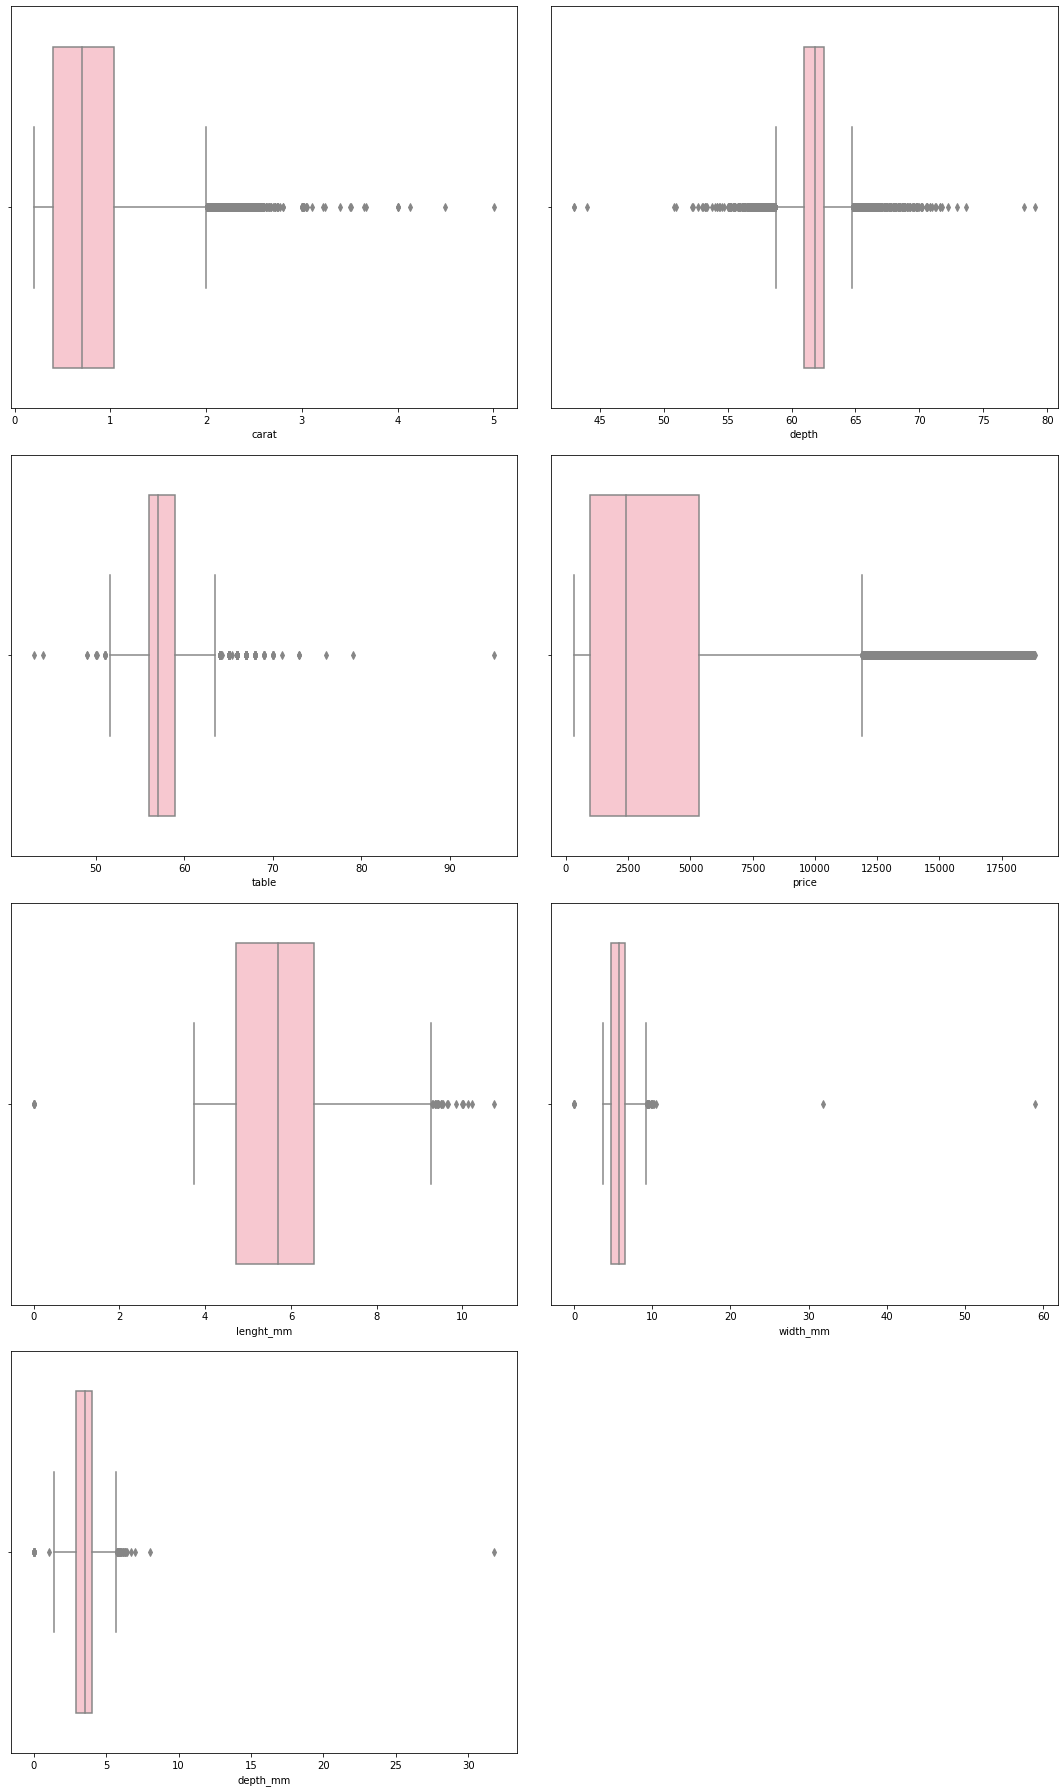

In [58]:
#creamos un df con solo las variables numéricas, para iterar y extraer los outliers de las valores numéricas:

numericas = df.select_dtypes(include=np.number)

fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "pink")

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

#### Interpretación de los outliers:

Por lo general, tenemos muchos outliers como predijimos anteriormente dado que nuestros valores en casi todas las columnas están muy dispersos.


Observamos que nuestra variable respuesta, *carats* cuenta con numerosos outliers (comprendidos de 2 a 5 carats). Los valores que más dispersos están son los del porcentaje de profundidad (*depth*), con valores extremos tanto a la baja como a la alta. Este fenómeno ocurre también en *table*, donde tenemos outliers a la alta pero también a la baja. 

Finalmente, en *prices*, tenemos muchos diamantes muy caros.

**Next steps**:

Detección y reemplazo de outliers. Para ello, generamos una función:

In [59]:
dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers

def detectar_outliers(lista_columnas, df): 
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q3, Q1 = np.nanpercentile(df[col], [75, 25])

        # optamos por multiplicarlo por 2 para recoger mayor cantidad de outliers
        outlier_step = 2 * (Q3 - Q1)
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
            print(col.upper())
            print("-----------")

    return dicc_indices

In [60]:
#todos los outliers del df:
index_all = detectar_outliers(numericas.columns, numericas)

CARAT
-----------
DEPTH
-----------
TABLE
-----------
PRICE
-----------
LENGHT_MM
-----------
WIDTH_MM
-----------
DEPTH_MM
-----------


In [61]:
#reemplazamos todos los outliers por la mediana a partir del diccionario creado con todas las columnas:
for k, v in index_all.items():
    median = df[k].median()
    
    for i in v:
        df.loc[i,k] = median

----------------------------------------
#### Exploración de la variable respuesta:
----------------------------------------

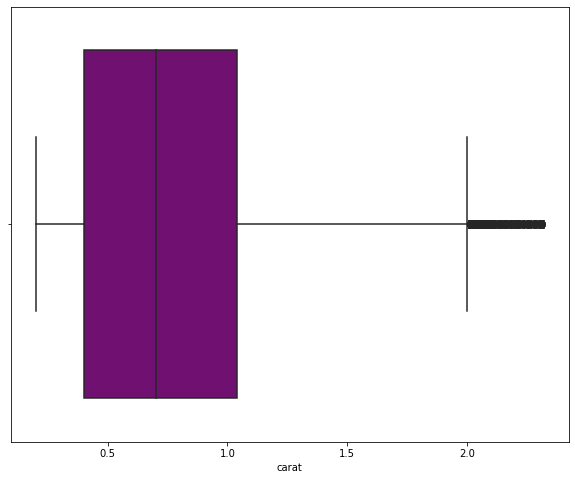

In [62]:
#hacemos un boxplot de la variable respuesta:
sns.boxplot(x=df['carat'], data=df, color='purple')
plt.show();

Hemos podido ampliar el rango intercuartílico y aunque sigue habiendo bastante outliers, son muchos menos que antes.

## Exploración de correlaciones:

#### Variable predictora:

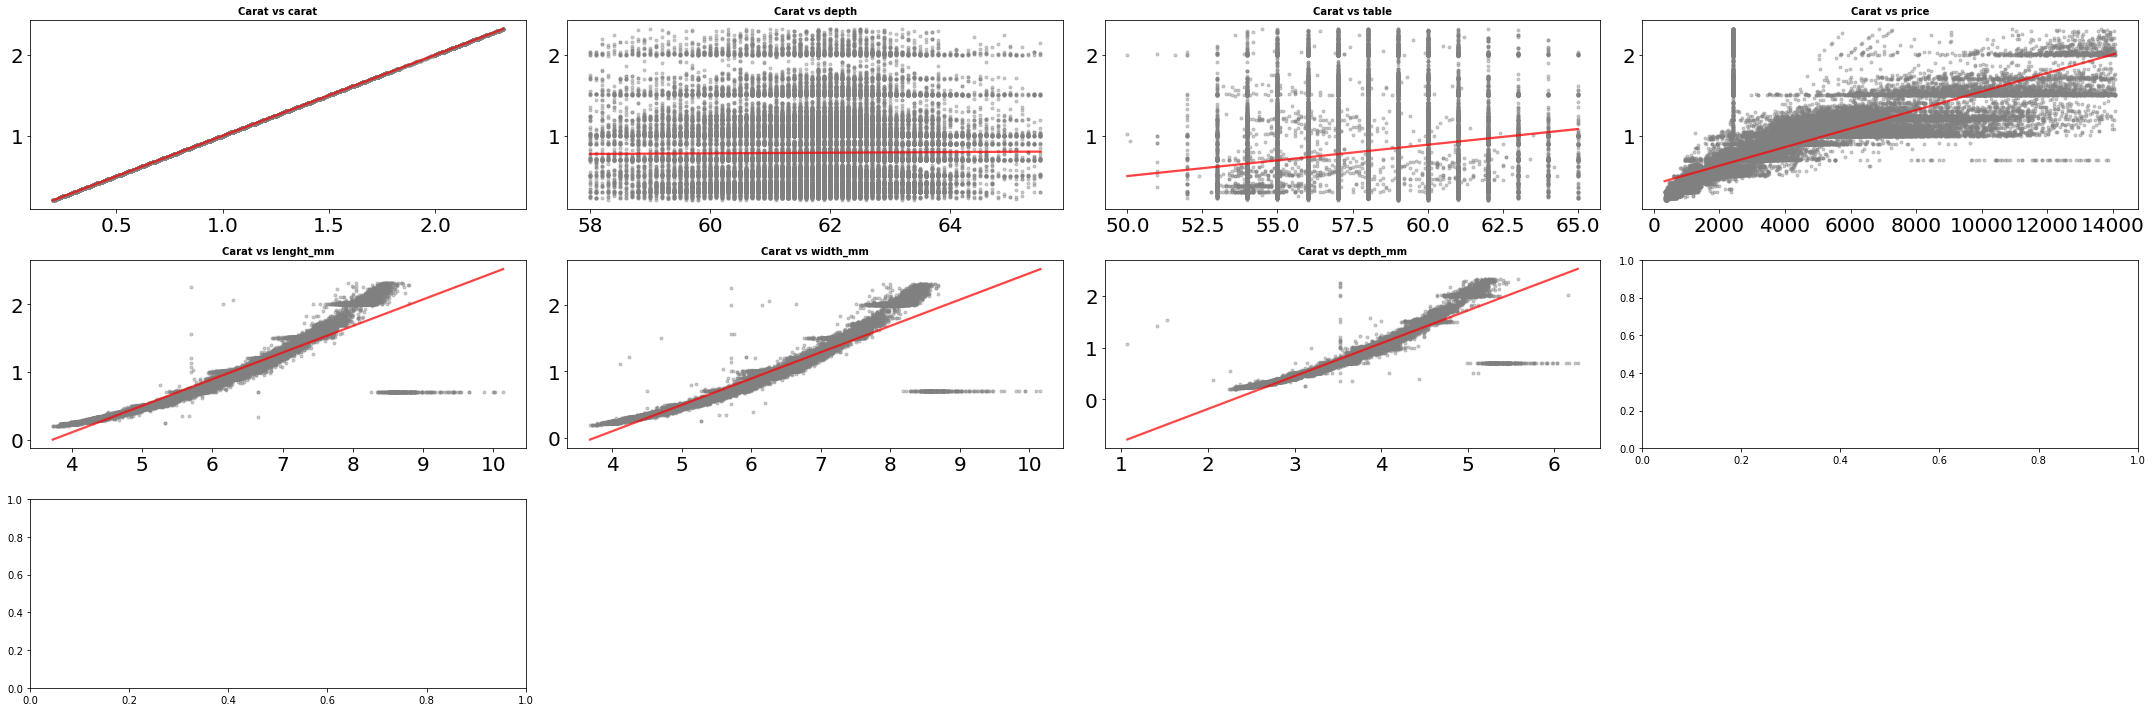

In [63]:
# Gráfico de relación entre variables predictoras (VP/VI) y la variable a predecir (VD/VR)

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

axes = axes.flat

df2_columns_num = df.select_dtypes(include=np.number)

for i, colum in enumerate(df2_columns_num):
    sns.regplot(
        x = df[colum],
        y = df['carat'],
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Carat vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

**Interpretación**:

A simple vista, vemos las siguientes relaciones:  

- Por lo general, la tendencia es que, a mayor carat, mayor la anchura, longitud y profundidad del diamante.

- No vemos una relación del todo clara entre los carats y el precio.

In [64]:
round(df.corr(),2)

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
carat,1.00,0.01,0.18,0.78,0.96,0.96,0.96
depth,0.01,1.00,-0.27,0.00,-0.03,-0.03,0.07
table,0.18,-0.27,1.00,0.12,0.20,0.19,0.16
price,0.78,0.00,0.12,1.00,0.79,0.79,0.78
lenght_mm,0.96,-0.03,0.20,0.79,1.00,1.00,0.99
width_mm,0.96,-0.03,0.19,0.79,1.00,1.00,0.99
depth_mm,0.96,0.07,0.16,0.78,0.99,0.99,1.00


Sin embargo, explorando los valores numéricos de las correlaciones, si existe una relación muy significativa (0.78) entre precio y carats. Ahora sí, podemos confirmar que los diamantes son mayores carats son los más caros.

También serán más caros aquellos que sean más largos (0.79), más profundos (0.78) y más anchos (0.79).


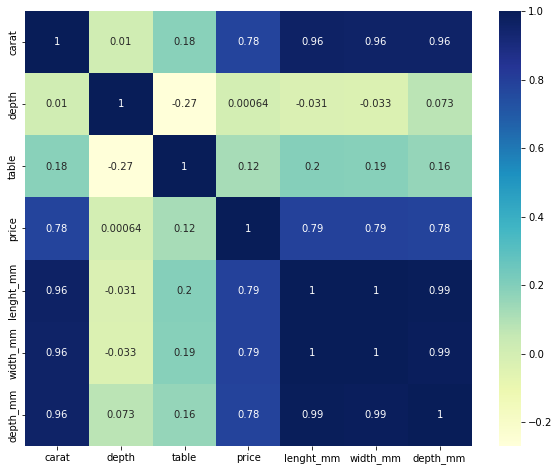

In [65]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

- Podemos intuir que la forma aproximada de los diamantes es cuadrada dada la tan estrecha correlación que existe entre el largo, el ancho y lo profundo: Es decir, que cuanto más ancho, más largo, y cuando más largo y ancho, más profundo. Por ello, la forma sería cuadrada o circular. 

- A mayor tamaño (ancho, largo y profundo), más caros.

#### Guardamos el csv:

In [66]:
df.to_csv('../datos/diamonds_1.csv')